# Data Exploration: Ready for take off!

In this file, we will perform **exploratory data analysis** for the ASUU Strike Effect Analysis Project. The data has been cleaned via `cleaning.ipynb` and is now ready for analysis. 

Here is the basic structure we'll follow. 
1. Data Inspection
2. Demographical analysis
3. Summary statistics for target across demographics and key features
4. Deepdive of target (CGPA change) across each feature
5. _[Another file] Inferential analysis and hypothesis testing._

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Inspection

Loading the data

In [3]:
# all data here include predicted course units

# complete info
df = pd.read_csv("../data/data_with_predicted_course_units.csv")

# contains students with no cgpa before or after 
df_invalid_cgpa = pd.read_csv("../data/incomplete_cgpa_only.csv")

# only contains students with complete cgpa information
df_valid_cgpa = pd.read_csv("../data/valid_cgpa_only.csv")

How does our data look?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   school         429 non-null    object 
 1   level          429 non-null    object 
 2   age            429 non-null    int64  
 3   gender         429 non-null    object 
 4   relationship   429 non-null    object 
 5   faculty        429 non-null    object 
 6   department     429 non-null    object 
 7   strike_effect  343 non-null    object 
 8   challenge      338 non-null    object 
 9   work           429 non-null    object 
 10  skills         429 non-null    object 
 11  prep_before    429 non-null    object 
 12  prep_after     429 non-null    object 
 13  lecture        429 non-null    object 
 14  academic_act   429 non-null    object 
 15  courses_taken  429 non-null    int64  
 16  course_unit    429 non-null    int64  
 17  cgpa_before    429 non-null    float64
 18  cgpa_after

In [5]:
df_invalid_cgpa.shape, df_valid_cgpa.shape

((109, 20), (313, 20))

In [6]:
df.describe()

,age,courses_taken,course_unit,cgpa_before,cgpa_after,cgpa_change
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,21.958042,7.878788,17.405594,2.759529,3.384776,0.625247
std,2.554657,1.830235,5.688040,1.710041,1.245637,1.679232
min,17.000000,0.000000,0.000000,0.000000,0.000000,-4.000000
25%,20.000000,7.000000,16.000000,0.000000,3.090000,-0.100000
50%,21.000000,8.000000,19.000000,3.470000,3.670000,0.010000
75%,23.000000,9.000000,21.000000,4.000000,4.200000,0.300000
max,37.000000,12.000000,30.000000,5.000000,5.000000,5.000000


In [7]:
df_invalid_cgpa.describe()

,age,courses_taken,course_unit,cgpa_before,cgpa_after,cgpa_change
count,109.000000,109.000000,109.000000,109.0,109.000000,109.000000
mean,20.688073,7.908257,16.302752,0.0,2.807798,2.807798
std,2.417901,1.858620,6.422623,0.0,1.870563,1.870563
min,17.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,19.000000,7.000000,14.000000,0.0,0.000000,0.000000
50%,20.000000,8.000000,18.000000,0.0,3.570000,3.570000
75%,22.000000,9.000000,20.000000,0.0,4.280000,4.280000
max,26.000000,12.000000,24.000000,0.0,5.000000,5.000000


In [8]:
df_valid_cgpa.describe()

,age,courses_taken,course_unit,cgpa_before,cgpa_after,cgpa_change
count,313.000000,313.000000,313.000000,313.00000,313.000000,313.000000
mean,22.392971,7.856230,17.792332,3.70616,3.661403,-0.044757
std,2.474657,1.819173,5.320347,0.66251,0.683510,0.418056
min,19.000000,3.000000,0.000000,1.00000,1.500000,-1.550000
25%,21.000000,7.000000,16.000000,3.26000,3.200000,-0.160000
50%,22.000000,8.000000,19.000000,3.75000,3.700000,0.000000
75%,23.000000,9.000000,21.000000,4.19000,4.200000,0.110000
max,37.000000,12.000000,30.000000,5.00000,5.000000,3.200000


Convert categories

In [9]:
# convert some columns to category
categorical_columns = [
    "school", "level", "gender", "relationship", "faculty", "department", "work","prep_before", "prep_after", "lecture", "academic_act", 
    ]

list_of_datasets = [df, df_invalid_cgpa, df_valid_cgpa]

for column in categorical_columns:
    for data in list_of_datasets:
        df[column] = df[column].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   school         429 non-null    category
 1   level          429 non-null    category
 2   age            429 non-null    int64   
 3   gender         429 non-null    category
 4   relationship   429 non-null    category
 5   faculty        429 non-null    category
 6   department     429 non-null    category
 7   strike_effect  343 non-null    object  
 8   challenge      338 non-null    object  
 9   work           429 non-null    category
 10  skills         429 non-null    object  
 11  prep_before    429 non-null    category
 12  prep_after     429 non-null    category
 13  lecture        429 non-null    category
 14  academic_act   429 non-null    category
 15  courses_taken  429 non-null    int64   
 16  course_unit    429 non-null    int64   
 17  cgpa_before    429 non-null    floa

## Demographical Analysis

Where are the students from?

In [11]:
df["school"].value_counts(normalize=True)*100

university of lagos                                                         96.270396
university of ibadan                                                         0.932401
funaab                                                                       0.466200
lagos state university                                                       0.466200
university of nigeria                                                        0.466200
alex ekwueme federal university ndufu-alike ikwo, abakaliki ebonyi state     0.233100
bayero university kano                                                       0.233100
federal university of petroleum resources effurun delta state                0.233100
oou ogun state                                                               0.233100
university of abuja                                                          0.233100
university of uyo                                                            0.233100
Name: school, dtype: float64

What are their academic levels?

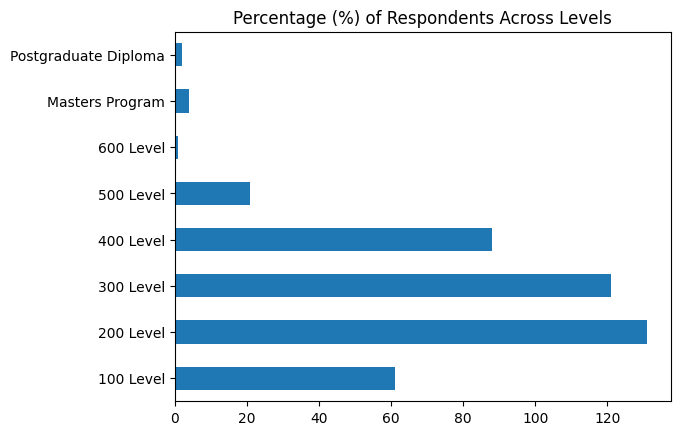

In [31]:
# prop_by_level = df["level"].value_counts(normalize=True).sort_values()*100

prop_by_level = df.groupby("level").count()["school"]

prop_by_level.plot(kind="barh", 
       title="Percentage (%) of Respondents Across Levels",
       xlabel="");

What about faculties?

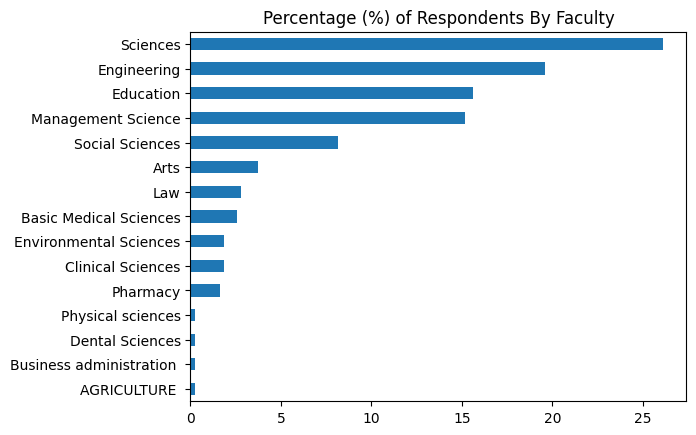

In [13]:
prop_by_faculty = df["faculty"].value_counts(normalize=True).sort_values()*100

prop_by_faculty.plot(
    kind="barh",
    title="Percentage (%) of Respondents By Faculty", 
    );

What about departments?

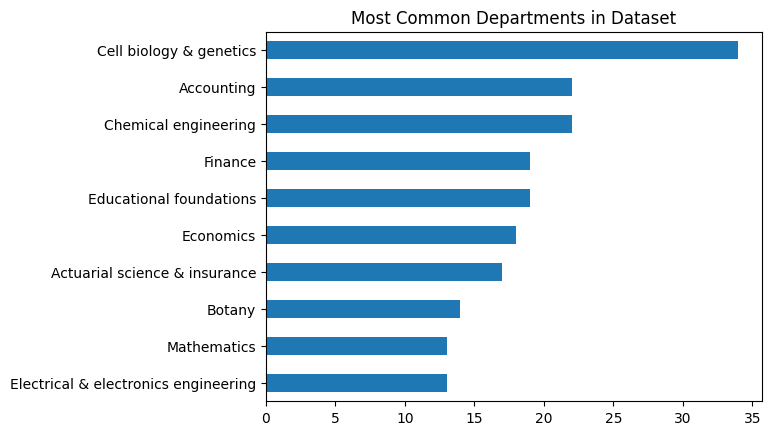

In [14]:
prop_by_dept = df["department"].value_counts().sort_values()

prop_by_dept.tail(10).plot(
    kind="barh",
    title= "Most Common Departments in Dataset",
);


What's the share by age?

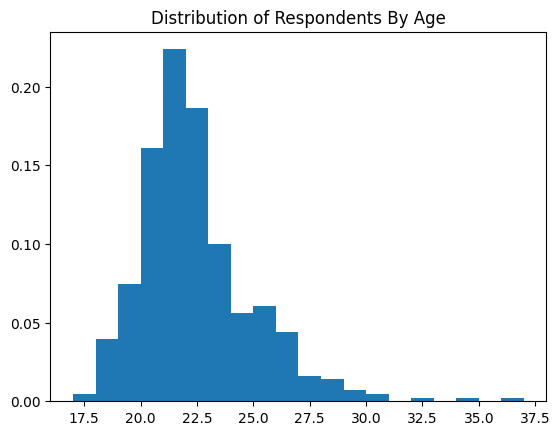

In [42]:
plt.hist(df["age"], bins=20, density=True)
plt.title("Distribution of Respondents By Age");

How is the data distributed by gender?

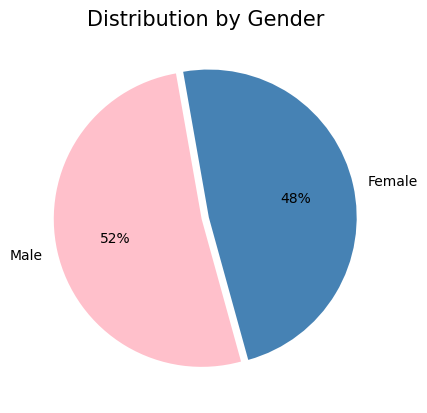

In [50]:
prop_by_gender = df["gender"].value_counts(normalize=True)*100


# Setting the colours for the pie chart
pie_colours = ['pink','steelblue']
  
# set a value for the separation of the slices
explode = (0.025, 0.025)
  
#plotting the pie chart on a column in the counted dataframe
prop_by_gender.plot(kind='pie', autopct='%1.0f%%', colors=pie_colours, explode=explode, startangle=100)


plt.title('Distribution by Gender', fontsize = 15)
plt.ylabel('');

What was the relationship status?

<AxesSubplot:title={'center':'Relationship Status of Repondents During the Strike (%)'}>

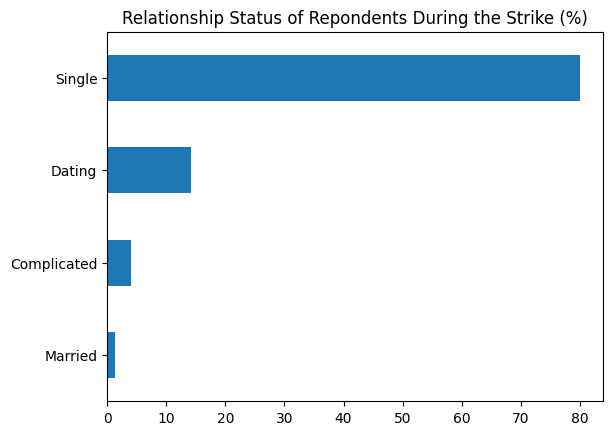

In [54]:
prop_by_relationship = df["relationship"].value_counts(normalize = True).sort_values()*100

prop_by_relationship.tail(4).plot(kind='barh', title="Relationship Status of Repondents During the Strike (%)")

## Summary Statistics